In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
co2=pd.read_csv('../data/owid-co2-data.csv')

In [10]:
co2world=co2[co2['country']=='World']
emit=co2world['co2'].values/3.664/1.e3 # in GtC

In [11]:
print(emit[-1])

9.94579366812227


Text(0, 0.5, 'Global Carbon Emissions (GTons $CO_2$)')

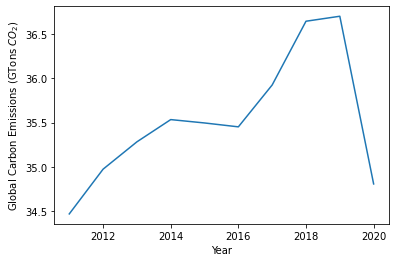

In [48]:
plt.plot(year[-10:],emit[-10:]/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTons $CO_2$)')

Text(0, 0.5, 'Global Carbon Emissions (GTC)')

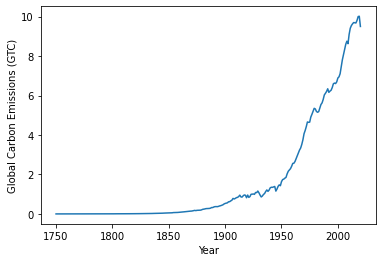

In [49]:
plt.plot(year,emit/3.664/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTC)')

2020
453.52535835152827


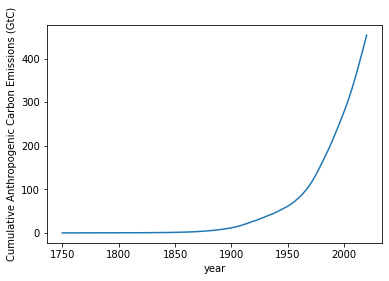

In [50]:
n=np.size(emit)
cum=np.zeros(n)
for i in range(n):
    cum[i]=np.sum(emit[:i])
plt.plot(year,cum/3.664/1.e3)
plt.xlabel('year')
plt.ylabel('Cumulative Anthropogenic Carbon Emissions (GtC)')
print(year[-1])
print(cum[-1]/3.664/1.e3)

Text(0, 0.5, 'Emissions (GtC)')

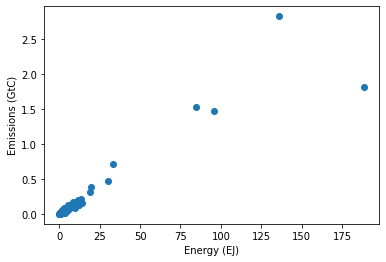

In [60]:
co22019=co2[co2['year']==2018]
co22019=co22019[co22019['country']!='World']
emissions=co22019['co2']
gdp=co22019['gdp']
population=co22019['population']
epc=co22019['energy_per_capita']
energy=epc*population  # in kilowatt-hours
kwhour=3600.*1000. #J
plt.scatter(energy*kwhour/1.e18,emissions/1.e3/3.644)
plt.xlabel('Energy (EJ)')
plt.ylabel('Emissions (GtC)')

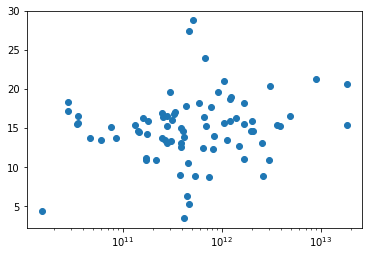

In [62]:
emissions_gm=emissions*1.e12/3.664 # emissions are in Mtonnes of CO_2; to get to grams, divide by this
intensity=emissions_gm/(energy*kwhour/1.e6) #gm/MJ
plt.scatter(gdp,intensity)
plt.xscale('log')

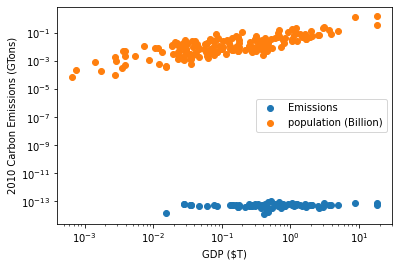

In [52]:
plt.scatter(gdp/1.e12,emissions/1.e3/3.664/energy,label='Emissions')
plt.xlabel('GDP ($T)')
plt.ylabel('2010 Carbon Emissions (GTons)')
plt.scatter(gdp/1.e12,population/1.e9,label='population (Billion)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

242
165
(165, 2) (165,)
[ 1.15127848 -0.15936307] -3.28544157950044
0.9276033712000906


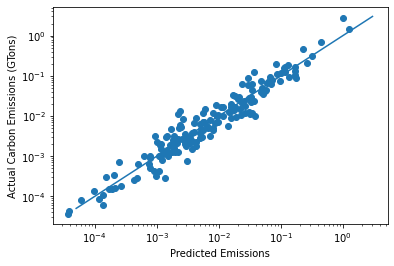

In [34]:
co22019=co2[co2['year']==2018]
co22019=co22019[co22019['country']!='World']
emissions=co22019['co2']
gdp=co22019['gdp']
population=co22019['population']
#Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
## clean up nans
n=np.size(emissions)
print(n)
for i in gdp.index:
    if (np.isnan(gdp[i]) or np.isnan(emissions[i]) or np.isnan(population[i])): 
        del gdp[i]
        del emissions[i]
        del population[i]
n=np.size(emissions)
print(n)
emissions=emissions.values/1.e3/3.664
gdp=gdp.values/1.e12
population=population.values/1.e9
#gdp=gdp.reshape(-1,1)
#print(emissions)
#emissions=emissions.reshape(-1,1)
X=np.transpose([np.log(gdp),np.log(population)])
print(np.shape(X),np.shape(emissions))
lin_reg.fit(X,np.log(emissions))
print(lin_reg.coef_,lin_reg.intercept_)
x=np.arange(0,20,.0001)
#x.reshape(-1,1)
plt.scatter(np.exp(lin_reg.predict(X)),(emissions))#,label='2D Regression Fit')
#plt.scatter(gdp,emissions,label='Data')
plt.xlabel('Predicted Emissions')
plt.ylabel('Actual Carbon Emissions (GTons)')
plt.plot([5.e-5,3],[5.e-5,3])
#plt.axis([5.e-4,3,1.e-4,3])
plt.yscale('log')
plt.xscale('log')
print(lin_reg.score(X,np.log(emissions)))

If you extrapolate that fit to the world, which has a much higher population and GDP than any other point, what will happen? Well, maybe China is a good example: it has 1/7 of the population and the model tries to fit it but still under-predicts. So, likely for the world, the model will underpredict the actual emissions. And that is correct: the next box shows that the model predicts 6, while the data is 50% higher.

In [270]:
world=co2[co2['year']==2010]
world=world[world['country']=='World']
gdp=world['gdp'].values/1.e12
pop=world['population'].values/1.e9
emissions=world['co2'].values/3.664/1.e3
X=np.transpose([np.log(gdp),np.log(pop)])
print(np.exp(lin_reg.predict(X)))
print(emissions)

[5.89703261]
[9.04255213]


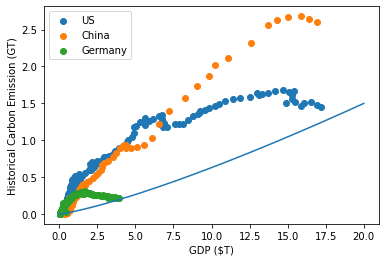

In [246]:
us=co2[co2['country']=='United States']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
plt.scatter(ugdp,uco2,label='US')

us=co2[co2['country']=='China']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
plt.scatter(ugdp,uco2,label='China')

us=co2[co2['country']=='Germany']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
plt.scatter(ugdp,uco2,label='Germany')

x=np.arange(.01,20,.001)
plt.xlabel('GDP ($T)')
plt.ylabel('Historical Carbon Emission (GT)')
plt.plot(x,np.exp(lin_reg.coef_[0]*np.log(x)+lin_reg.intercept_))
plt.legend()


Text(0.5, 1.0, 'United States')

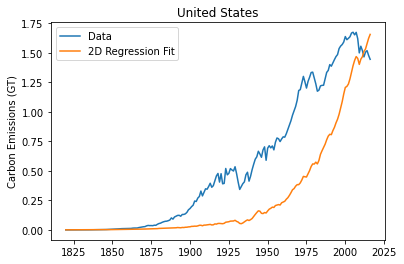

In [275]:
country='United States'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)


Text(0.5, 1.0, 'China')

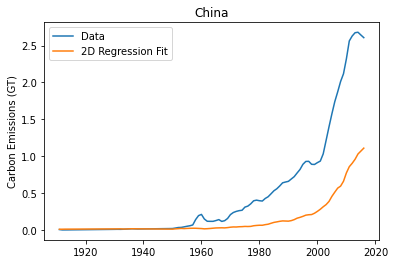

In [276]:
country='China'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')

plt.title(country)

Text(0.5, 1.0, 'India')

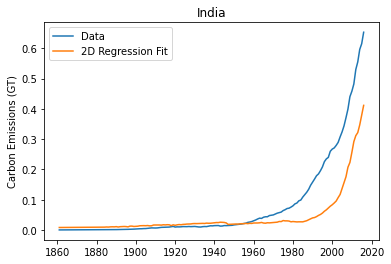

In [277]:
country='India'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')

plt.title(country)

Text(0.5, 1.0, 'Israel')

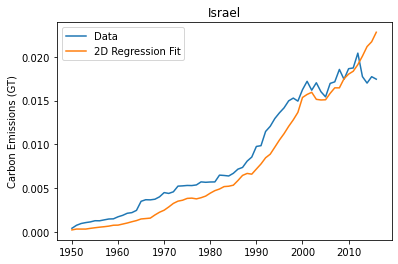

In [250]:
country='Israel'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'Japan')

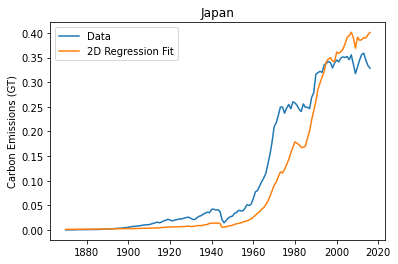

In [251]:
country='Japan'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'World')

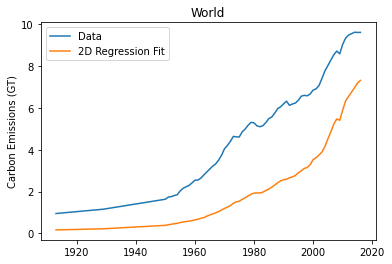

In [252]:
country='World'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'Indonesia')

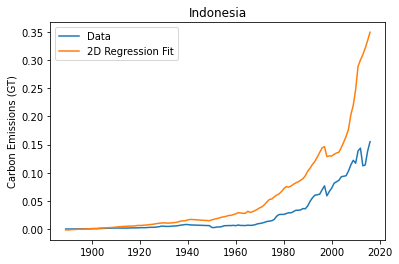

In [215]:
country='Indonesia'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([ugdp,upop])
plt.plot(yr,lin_reg.predict(X),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)